In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a classification dataset
from sklearn.datasets import make_circles

# Set samples to 1000
n_samples = 1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Let's visualise our data
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
len(X)

1000

In [6]:
# Let's split our data into training and testing data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [8]:
# Check the shapes of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [9]:
# Let's Build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequqntial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # Input layer with relu activation function
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # Output layer with sigmoid activation function
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 0s 891us/step - loss: 0.6913 - accuracy: 0.5312
Epoch 2/25
25/25 [==============================] - 0s 876us/step - loss: 0.6839 - accuracy: 0.5337
Epoch 3/25
25/25 [==============================] - 0s 755us/step - loss: 0.6749 - accuracy: 0.5750
Epoch 4/25
25/25 [==============================] - 0s 762us/step - loss: 0.6678 - accuracy: 0.6087
Epoch 5/25
25/25 [==============================] - 0s 696us/step - loss: 0.6574 - accuracy: 0.6525
Epoch 6/25
25/25 [==============================] - 0s 709us/step - loss: 0.6441 - accuracy: 0.5888
Epoch 7/25
25/25 [==============================] - 0s 755us/step - loss: 0.6269 - accuracy: 0.7525
Epoch 8/25
25/25 [==============================] - 0s 721us/step - loss: 0.6108 - accuracy: 0.6875
Epoch 9/25
25/25 [==============================] - 0s 728us/step - loss: 0.5754 - accuracy: 0.7650
Epoch 10/25
25/25 [==============================] - 0s 778us/step - loss: 0.5514 - accuracy: 0.7487

In [10]:
# Let's evaluate our model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 0s/step - loss: 0.1784 - accuracy: 0.9400
Model loss on the test set: 0.17835357785224915
Model accuracy on the test set: 94.00%


In [13]:
# Lets Create a plotting function 
def plot_decision_boundary(model, X, y):
    
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define the axis boundaries and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values ( We are going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # Check for multiclass 
    if model.output_shape[-1] > 1:
        print("We are doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print(" we are doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot the decision boundary 
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 541us/step
 we are doing binary classification...
313/313 [==============================] - 0s 452us/step
 we are doing binary classification...


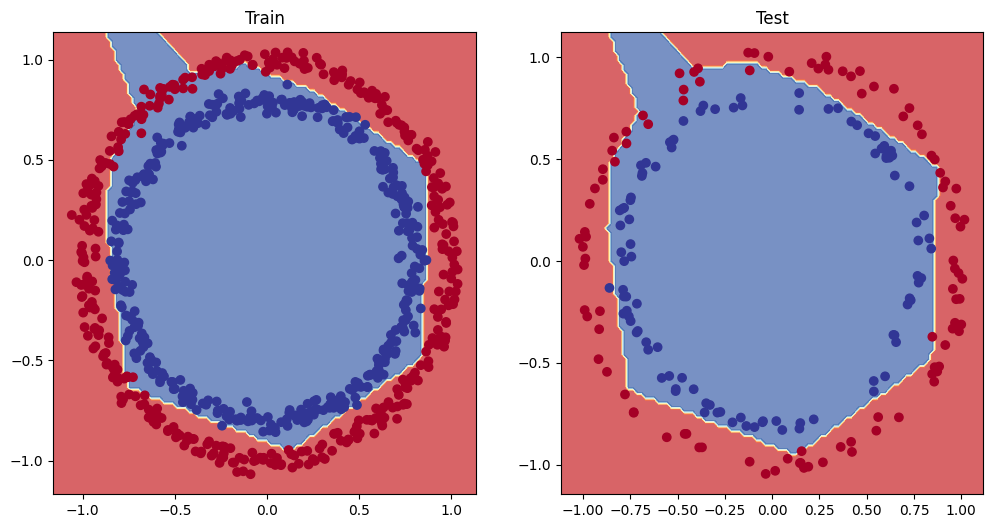

In [15]:
# Plot the decision boundaries for the training and test series
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

Check that out! How cool. With a few tweaks, our model is now predictiong the blue and red circles almost perfectly.